# Compare HDBScan results

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import SproutDataset
from Sprout_ML import Sprout_ML
plt.rcParams['image.origin'] = 'lower'

In [2]:
dset = SproutDataset.SproutDataset()
full_dset = dset.all_spectra

In [3]:
unique_values = full_dset['filename'].values
unique_values = set(unique_values.flatten())

sprout_fulldset = [Sprout_ML('C:\\Users\\tania\Documents\SPICE\SPROUTS\data_L2\\', x) for x in unique_values]

In [4]:
list(unique_values)

['solo_L2_spice-n-ras_20220502T042946_V22_117440787-000.fits',
 'solo_L2_spice-n-ras_20220220T125345_V22_100663594-000.fits',
 'solo_L2_spice-n-ras_20220222T134313_V22_100663612-000.fits',
 'solo_L2_spice-n-ras_20220223T112346_V22_100663621-000.fits',
 'solo_L2_spice-n-ras_20220501T153540_V22_117440780-000.fits',
 'solo_L2_spice-n-ras_20220503T031845_V22_117440792-000.fits',
 'solo_L2_spice-n-ras_20220225T112345_V22_100663631-000.fits',
 'solo_L2_spice-n-ras_20220221T111845_V22_100663607-000.fits',
 'solo_L2_spice-n-ras_20220501T033540_V22_117440776-000.fits',
 'solo_L2_spice-n-ras_20220224T112346_V22_100663626-000.fits']

20220220T125345


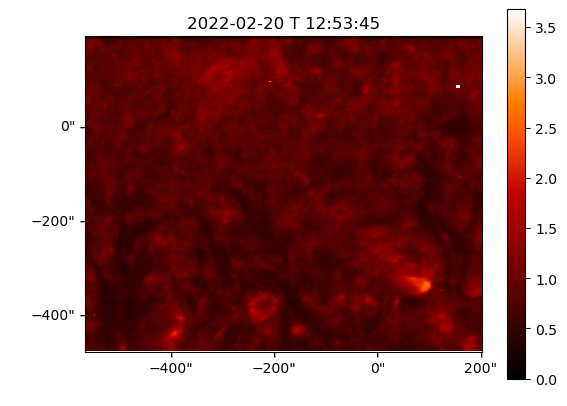

20220224T112346


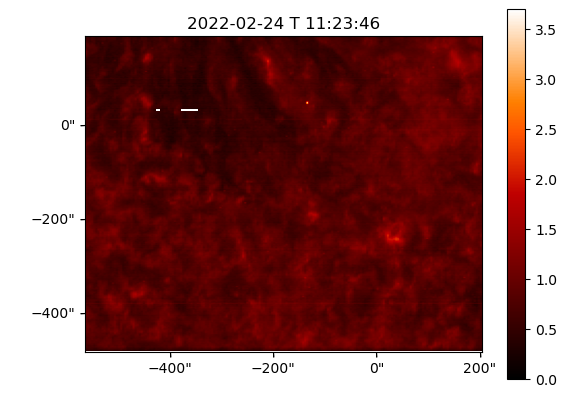

20220221T111845


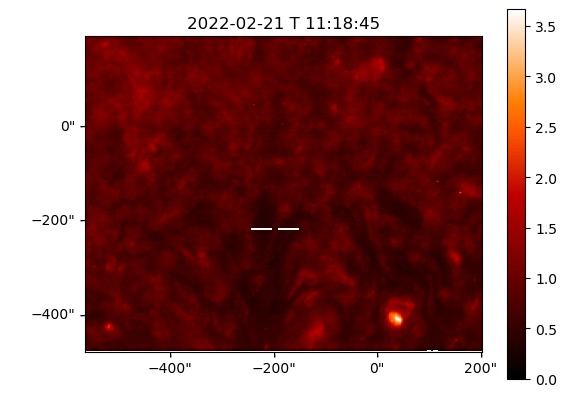

20220222T134313


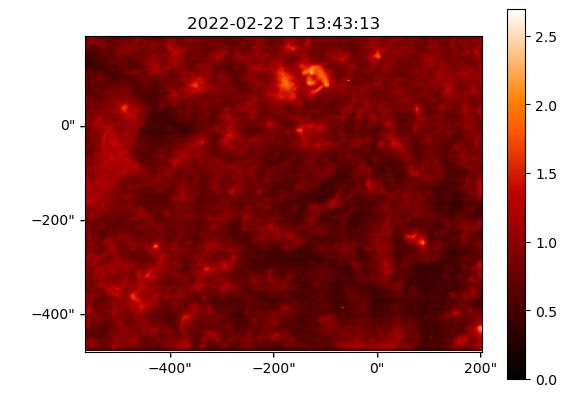

20220501T033540


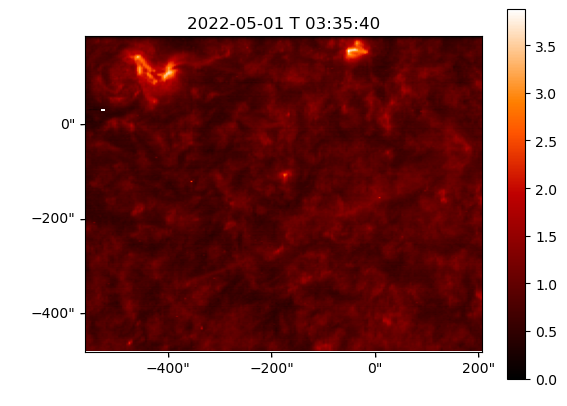

20220501T153540


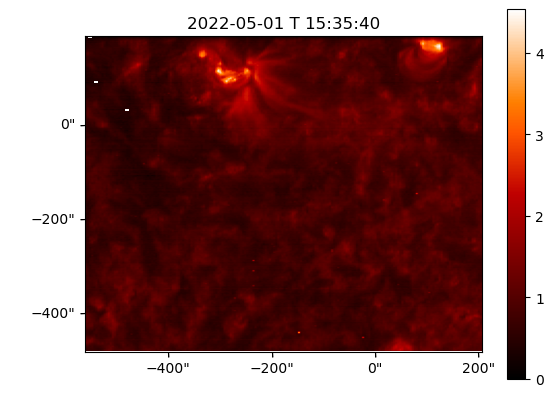

20220503T031845


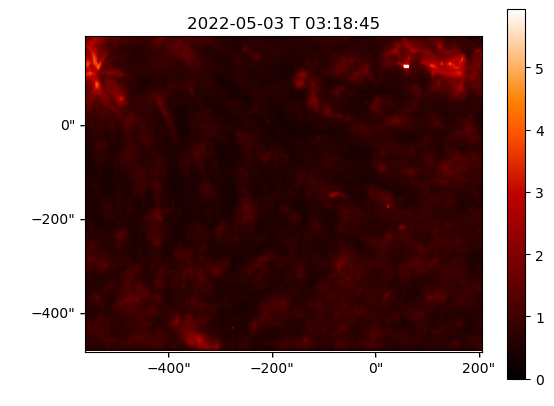

20220225T112345


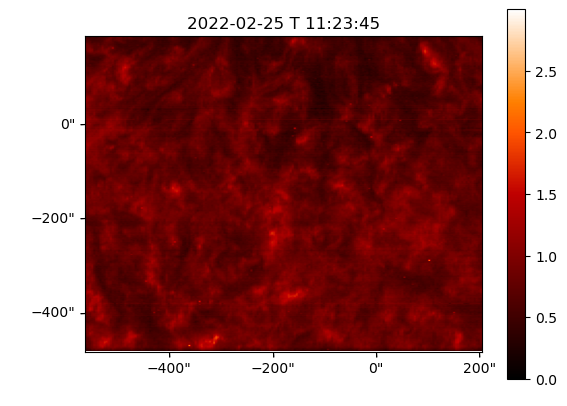

20220502T042946


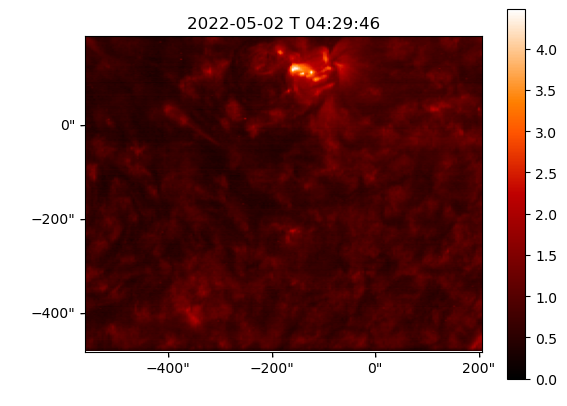

20220223T112346


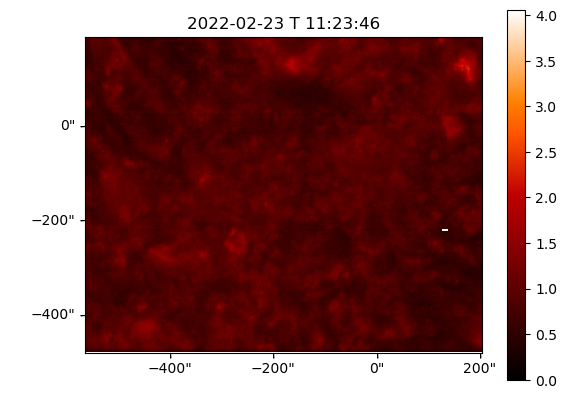

In [10]:
i=0
for x in sprout_fulldset:
    x.whatsgoingon(croplatbottom=725, croplattop=115)
    datetime_str = list(unique_values)[i].split('_')[3]
    print(datetime_str)
    date = datetime_str[:8]  
    time = datetime_str[9:] 
    plt.title(f"{date[:4]}-{date[4:6]}-{date[6:]} T {time[:2]}:{time[2:4]}:{time[4:]}")
    plt.show()
    i+=1

In [5]:
double30_30 = np.load('saved_outputs//clustered_outputs_double64_fulldata_minclus30_minsamp30.npy')
single30_30 = np.load('saved_outputs//clustered_outputs_64_fulldata_minclus30_minsamp30.npy')
double50_15 = np.load('saved_outputs//clustered_outputs_double64_fulldata_minclus50_minsamp15.npy')
single50_15 = np.load('saved_outputs//clustered_outputs_64_fulldata_minclus50_minsamp15.npy')
double15_15 = np.load('saved_outputs//clustered_outputs_double64_fulldata_minclus15_minsamp15.npy')
single15_15 = np.load('saved_outputs//clustered_outputs_64_fulldata_minclus15_minsamp15.npy')
double50_5 = np.load('saved_outputs//clustered_outputs_double64_fulldata_minclus50_minsamp5.npy')
single50_5 = np.load('saved_outputs//clustered_outputs_single64_fulldata_minclus50_minsamp5.npy')

In [14]:
stacked_outputs_single64 = np.load('saved_outputs//stacked_outputs_single64_fulldata.npy')

In [ ]:
stacked_outputs_single64.mean(axis=0)
# normalize to mean=0 and std=1
# broadcasting

array([-0.27724403,  1.1958046 , -0.71308255,  0.1718672 , -1.8914809 ,
       -0.77700925,  1.6620988 ,  1.5976561 ,  2.911796  , -1.2245853 ,
        0.5365309 ,  2.3580203 ,  0.60412675, -2.1446636 , -3.8872764 ,
        4.3892446 ,  1.0074837 , -2.2620473 , -1.0483404 ,  1.8383172 ,
       -0.08492188, -0.631694  ,  2.2051873 ,  1.1149591 , -2.3242035 ,
        1.2913337 ,  0.05105532, -5.245691  ,  3.7124023 , -0.43654498,
        3.3094711 , -4.351887  ,  0.6320983 ,  4.2890677 ,  1.0238229 ,
       -0.86305845,  0.4938451 ,  5.7106314 ,  0.46612224, -0.6283124 ,
       -0.79361606, -1.55723   ,  2.1824331 , -0.14018841, -2.1893787 ,
        1.4398715 ,  0.18151696, -3.5942445 ,  2.2207682 , -0.13026057,
       -0.48371804, -2.7283542 ,  2.2041473 ,  0.5385523 , -1.2575911 ,
       -2.1437955 , -1.5697615 ,  1.1562444 ,  0.6939631 ,  0.3532134 ,
        2.2402055 ,  1.2392879 , -0.7531429 , -2.4216235 ], dtype=float32)

In [17]:
stacked_outputs_single64.std(axis=0)

array([0.21152876, 0.19028169, 0.2911049 , 0.28114766, 0.722199  ,
       0.17954153, 0.32958528, 0.27419433, 0.5098907 , 0.23108415,
       0.18620685, 0.54018885, 0.24217646, 0.38171527, 0.81100965,
       0.53381157, 0.5460744 , 0.483844  , 0.24369633, 0.147672  ,
       0.26367474, 0.28933614, 0.48473302, 0.4827514 , 0.36157307,
       0.30186033, 0.2914173 , 0.7547328 , 0.46526688, 0.40727508,
       0.39082465, 0.71231973, 0.1815143 , 0.6671383 , 0.2544838 ,
       0.43365982, 0.23039292, 1.020433  , 0.4850323 , 0.65215105,
       0.4731761 , 0.2693293 , 0.4374413 , 0.69053227, 0.38591152,
       0.491886  , 0.22691119, 0.400663  , 0.22864251, 0.27723312,
       0.26752427, 0.34285453, 0.1927526 , 0.278719  , 0.2326452 ,
       0.50822   , 0.17842945, 0.5064685 , 0.2597232 , 0.15190473,
       0.19872674, 0.199409  , 0.3775919 , 0.32289305], dtype=float32)

In [18]:
stacked_outputs_single64.shape

(1171200, 64)

In [23]:
centered_std1_stacked_outputs_single64 = (stacked_outputs_single64-stacked_outputs_single64.mean(axis=0))/stacked_outputs_single64.std(axis=0)

In [24]:
centered_std1_stacked_outputs_single64.mean(axis=0)

array([-9.10880117e-05, -2.49454868e-03,  4.67775908e-06, -7.78026424e-06,
       -1.47604533e-05, -9.22163526e-05,  5.44504076e-03,  9.88933956e-04,
       -6.60801353e-03,  1.63832119e-05,  6.93969778e-05,  1.34773273e-03,
        2.95628543e-05, -5.54430007e-04, -3.55237571e-04,  9.51238535e-03,
        1.86754958e-04, -5.59051587e-05, -2.97949242e-04,  8.10978643e-04,
       -4.10288612e-06, -1.98798307e-06,  9.73596179e-05, -7.54054869e-04,
       -4.11907939e-04,  1.65774324e-03, -7.26248430e-08, -3.37099569e-04,
        4.90662735e-03,  1.03877692e-05, -8.81749950e-03,  1.58165989e-03,
       -3.11247422e-05,  1.24213817e-02, -1.17641722e-03, -1.83975226e-05,
        1.13533833e-05, -3.81423160e-03,  1.38103542e-05, -1.33998003e-06,
       -5.42559565e-06, -4.08221997e-04,  2.39350181e-03, -3.27053090e-06,
        3.38897132e-03,  3.00671246e-07, -1.45523645e-05, -5.87902451e-03,
        5.49000595e-03,  1.65768893e-06,  2.37107852e-05,  8.78943247e-05,
        6.52729953e-03, -

In [ ]:
# try with min_cluster_size and min_samples, cluster_selection_epsilon

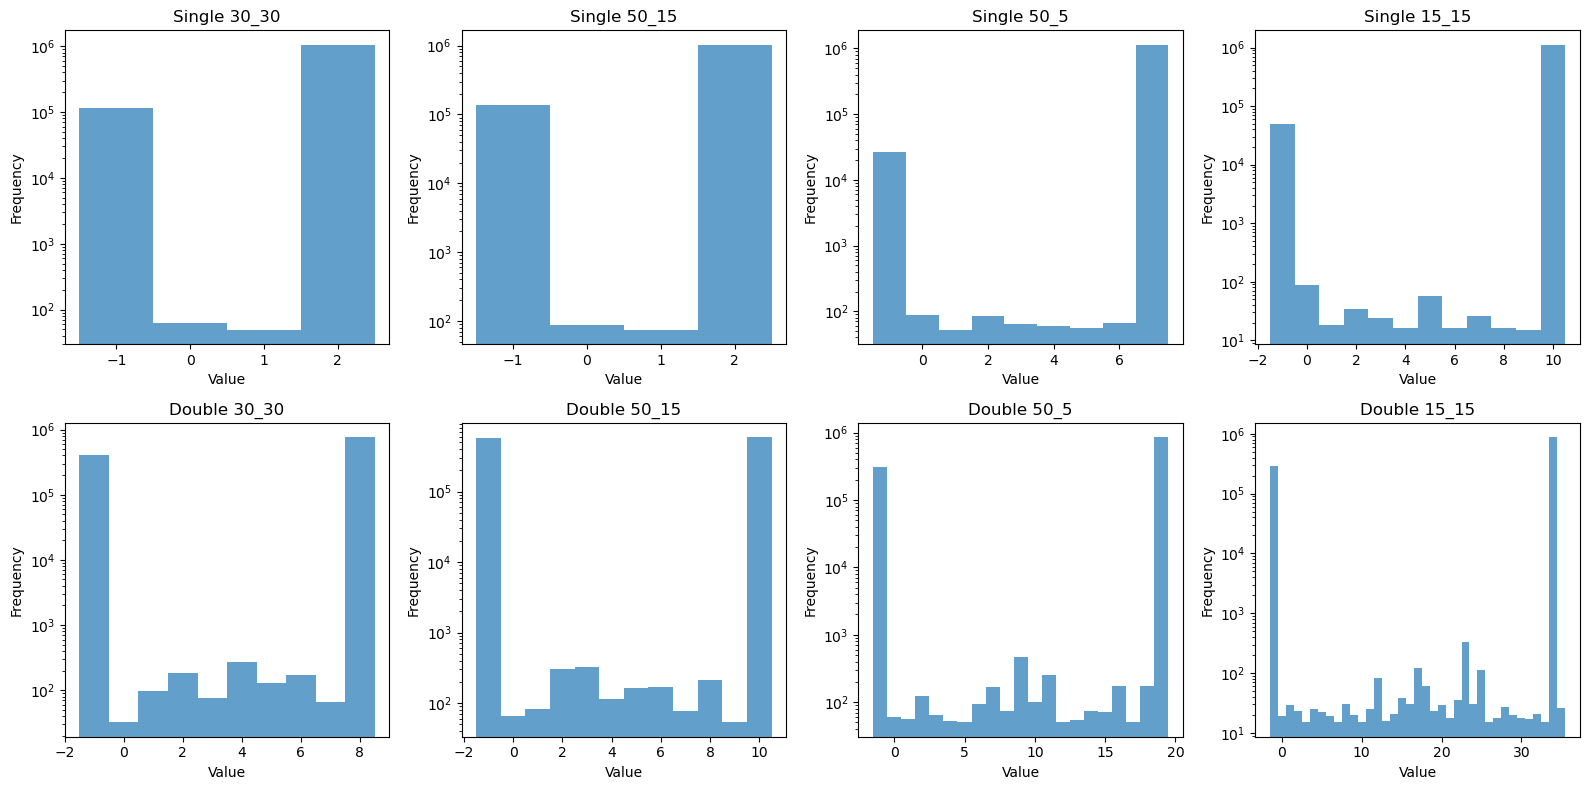

In [6]:
titles = ["Single 30_30", "Single 50_15", "Single 50_5", "Single 15_15", "Double 30_30", "Double 50_15", "Double 50_5", "Double 15_15"]
data = [single30_30, single50_15, single50_5, single15_15, double30_30, double50_15, double50_5, double15_15]
# Plot the histograms
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
colors = plt.cm.tab20.colors

for i, ax in enumerate(axes.flat):
    ax.hist(data[i], bins=np.arange(-1, np.max(data[i])+1)-0.5, alpha=0.7, color=colors[0])
    ax.set_title(titles[i])
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.set_yscale('log')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [9]:
from matplotlib.colors import Normalize

# 2D projections

In [7]:
proj_double = np.load('saved_outputs//umap_data_64dou_fulldata_neig15_dist01.npy')
proj_single = np.load('saved_outputs//umap_data_single64_fulldata_nei15_dist01.npy')

## Single augmentation

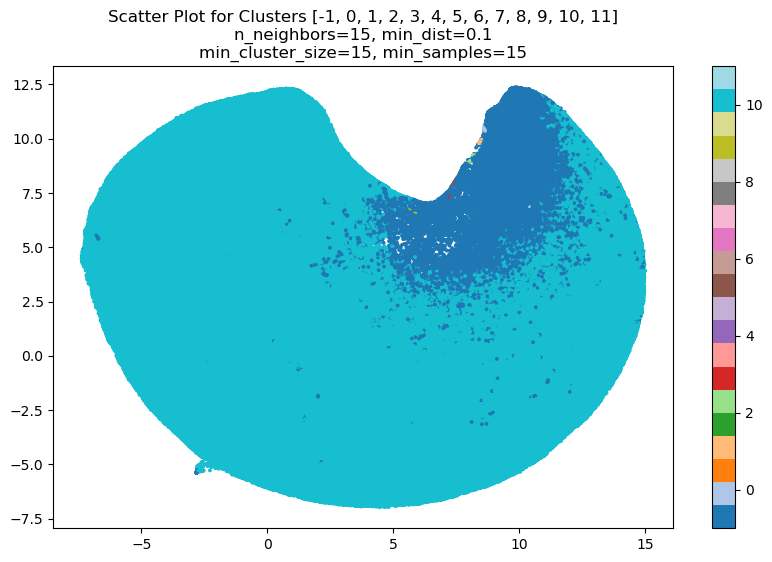

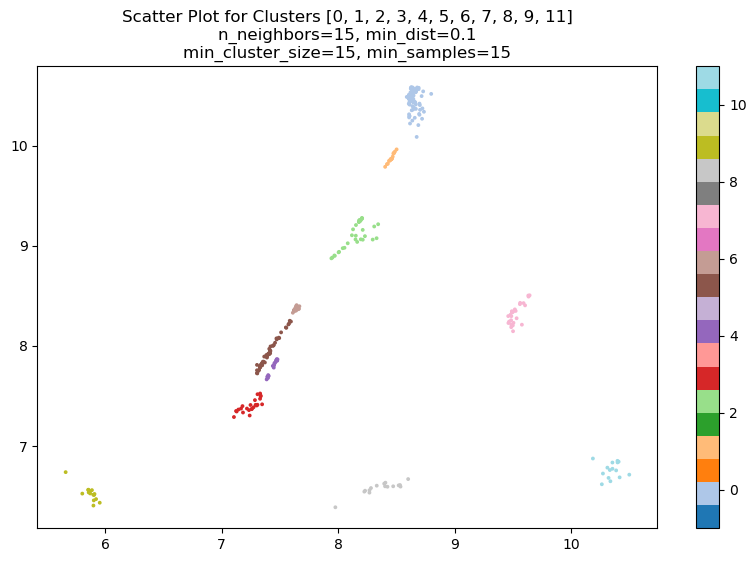

In [11]:
target_clusters = [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]  # List of cluster labels to plot
# target_clusters = [-1]
selected_points = proj_single[np.isin(single15_15, target_clusters)]
selected_labels = single15_15[np.isin(single15_15, target_clusters)]
norm = Normalize(vmin=single15_15.min(), vmax=single15_15.max())

plt.figure(figsize=(10, 6))
plt.scatter(selected_points[:, 0], selected_points[:, 1], c=selected_labels, cmap='tab20', norm=norm, s=3)
plt.title(f"Scatter Plot for Clusters {target_clusters}\nn_neighbors=15, min_dist=0.1\nmin_cluster_size=15, min_samples=15")
plt.colorbar()
plt.show()


target_clusters = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11]  # List of cluster labels to plot
selected_points = proj_single[np.isin(single15_15, target_clusters)]
selected_labels = single15_15[np.isin(single15_15, target_clusters)]
norm = Normalize(vmin=single15_15.min(), vmax=single15_15.max())

plt.figure(figsize=(10, 6))
plt.scatter(selected_points[:, 0], selected_points[:, 1], c=selected_labels, cmap='tab20', norm=norm, s=3)
plt.title(f"Scatter Plot for Clusters {target_clusters}\nn_neighbors=15, min_dist=0.1\nmin_cluster_size=15, min_samples=15")
plt.colorbar()
plt.show()

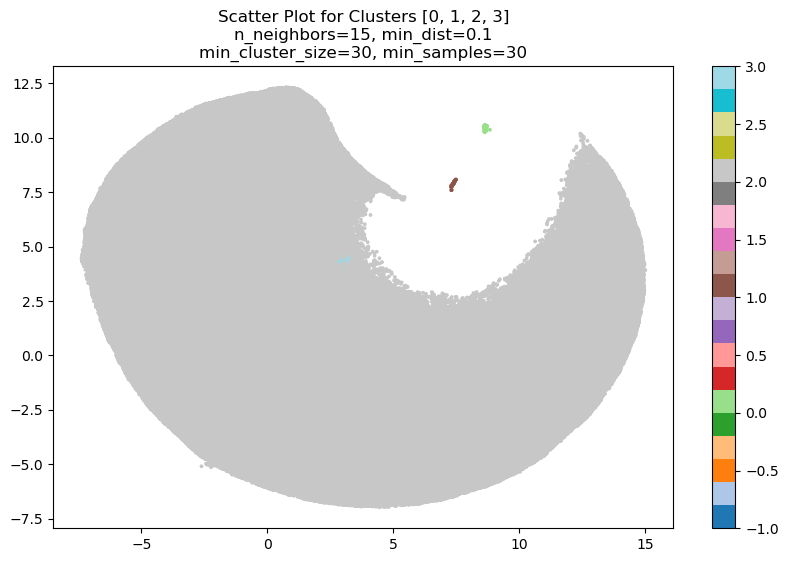

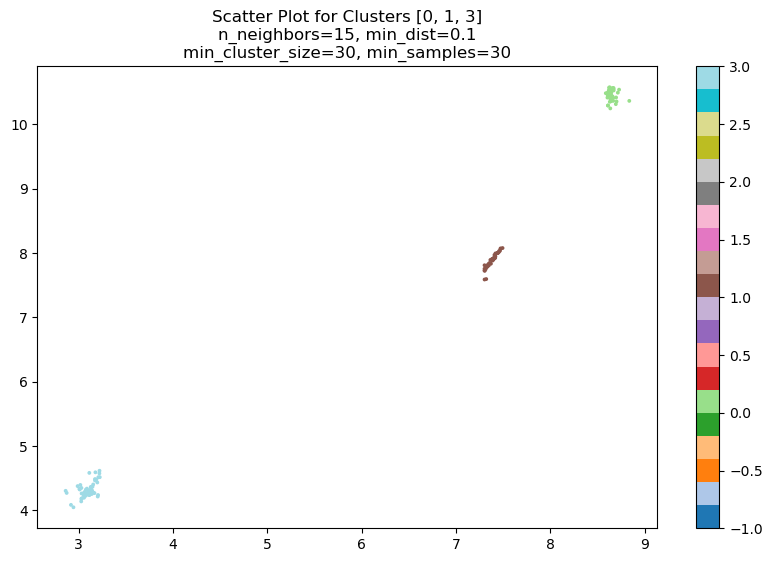

In [ ]:
target_clusters = [0, 1, 2, 3]  # List of cluster labels to plot
selected_points = proj_single[np.isin(single30_30, target_clusters)]
selected_labels = single30_30[np.isin(single30_30, target_clusters)]
norm = Normalize(vmin=single30_30.min(), vmax=single30_30.max())

plt.figure(figsize=(10, 6))
plt.scatter(selected_points[:, 0], selected_points[:, 1], c=selected_labels, cmap='tab20', norm=norm, s=3)
plt.title(f"Scatter Plot for Clusters {target_clusters}\nn_neighbors=15, min_dist=0.1\nmin_cluster_size=30, min_samples=30")
plt.colorbar()
plt.show()


target_clusters = [0, 1, 3]  # List of cluster labels to plot
selected_points = proj_single[np.isin(single30_30, target_clusters)]
selected_labels = single30_30[np.isin(single30_30, target_clusters)]
norm = Normalize(vmin=single30_30.min(), vmax=single30_30.max())

plt.figure(figsize=(10, 6))
plt.scatter(selected_points[:, 0], selected_points[:, 1], c=selected_labels, cmap='tab20', norm=norm, s=3)
plt.title(f"Scatter Plot for Clusters {target_clusters}\nn_neighbors=15, min_dist=0.1\nmin_cluster_size=30, min_samples=30")
plt.colorbar()
plt.show()

In [ ]:
target_clusters = [0, 1, 2, 3]  # List of cluster labels to plot
selected_points = proj_single[np.isin(single50_15, target_clusters)]
selected_labels = single50_15[np.isin(single50_15, target_clusters)]
norm = Normalize(vmin=single50_15.min(), vmax=single50_15.max())

plt.figure(figsize=(10, 6))
plt.scatter(selected_points[:, 0], selected_points[:, 1], c=selected_labels, cmap='tab20', norm=norm, s=3)
plt.title(f"Scatter Plot for Clusters {target_clusters}\nn_neighbors=15, min_dist=0.1\nmin_cluster_size=50, min_samples=15")
plt.colorbar()
plt.show()


target_clusters = [0, 1, 3]  # List of cluster labels to plot
selected_points = proj_single[np.isin(single50_15, target_clusters)]
selected_labels = single50_15[np.isin(single50_15, target_clusters)]
norm = Normalize(vmin=single50_15.min(), vmax=single50_15.max())

plt.figure(figsize=(10, 6))
plt.scatter(selected_points[:, 0], selected_points[:, 1], c=selected_labels, cmap='tab20', norm=norm, s=3)
plt.title(f"Scatter Plot for Clusters {target_clusters}\nn_neighbors=15, min_dist=0.1\nmin_cluster_size=50, min_samples=15")
plt.colorbar()
plt.show()

## Double augmentation

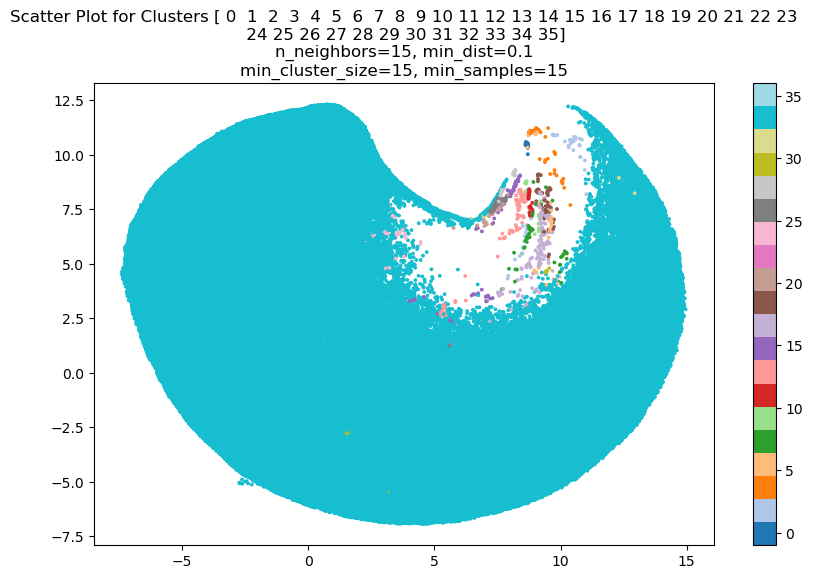

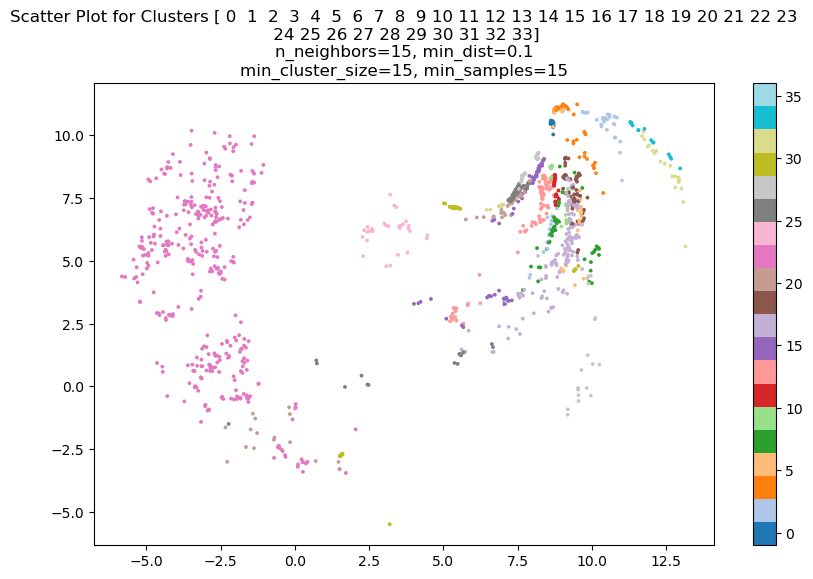

In [ ]:
target_clusters = np.arange(0, double15_15.max())  # List of cluster labels to plot
selected_points = proj_single[np.isin(double15_15, target_clusters)]
selected_labels = double15_15[np.isin(double15_15, target_clusters)]
norm = Normalize(vmin=double15_15.min(), vmax=double15_15.max())

plt.figure(figsize=(10, 6))
plt.scatter(selected_points[:, 0], selected_points[:, 1], c=selected_labels, cmap='tab20', norm=norm, s=3)
plt.title(f"Scatter Plot for Clusters {target_clusters}\nn_neighbors=15, min_dist=0.1\nmin_cluster_size=15, min_samples=15")
plt.colorbar()
plt.show()


target_clusters = np.arange(0, 34)  # List of cluster labels to plot
selected_points = proj_single[np.isin(double15_15, target_clusters)]
selected_labels = double15_15[np.isin(double15_15, target_clusters)]
norm = Normalize(vmin=double15_15.min(), vmax=double15_15.max())

plt.figure(figsize=(10, 6))
plt.scatter(selected_points[:, 0], selected_points[:, 1], c=selected_labels, cmap='tab20', norm=norm, s=3)
plt.title(f"Scatter Plot for Clusters {target_clusters}\nn_neighbors=15, min_dist=0.1\nmin_cluster_size=15, min_samples=15")
plt.colorbar()
plt.show()

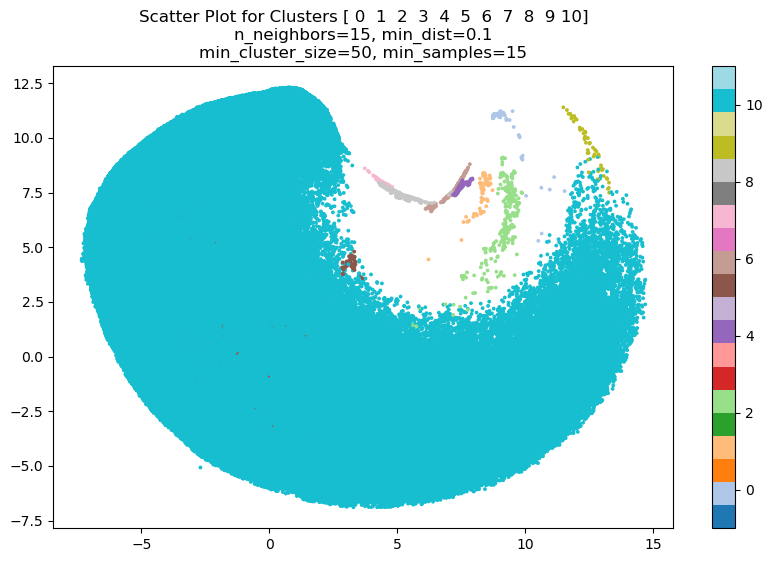

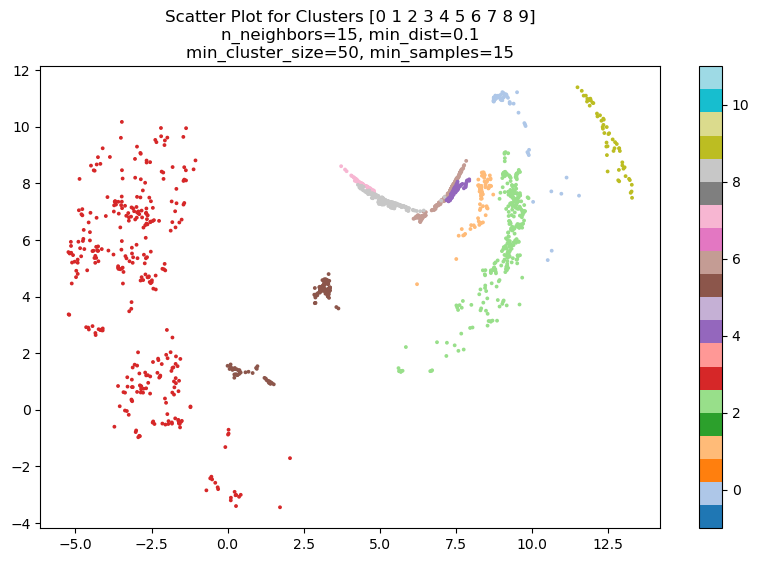

In [ ]:
target_clusters = np.arange(0, double50_15.max())
selected_points = proj_single[np.isin(double50_15, target_clusters)]
selected_labels = double50_15[np.isin(double50_15, target_clusters)]
norm = Normalize(vmin=double50_15.min(), vmax=double50_15.max())

plt.figure(figsize=(10, 6))
plt.scatter(selected_points[:, 0], selected_points[:, 1], c=selected_labels, cmap='tab20', norm=norm, s=3)
plt.title(f"Scatter Plot for Clusters {target_clusters}\nn_neighbors=15, min_dist=0.1\nmin_cluster_size=50, min_samples=15")
plt.colorbar()
plt.show()


target_clusters = np.arange(0, double50_15.max()-1)  # List of cluster labels to plot
selected_points = proj_single[np.isin(double50_15, target_clusters)]
selected_labels = double50_15[np.isin(double50_15, target_clusters)]
norm = Normalize(vmin=double50_15.min(), vmax=double50_15.max())

plt.figure(figsize=(10, 6))
plt.scatter(selected_points[:, 0], selected_points[:, 1], c=selected_labels, cmap='tab20', norm=norm, s=3)
plt.title(f"Scatter Plot for Clusters {target_clusters}\nn_neighbors=15, min_dist=0.1\nmin_cluster_size=50, min_samples=15")
plt.colorbar()
plt.show()

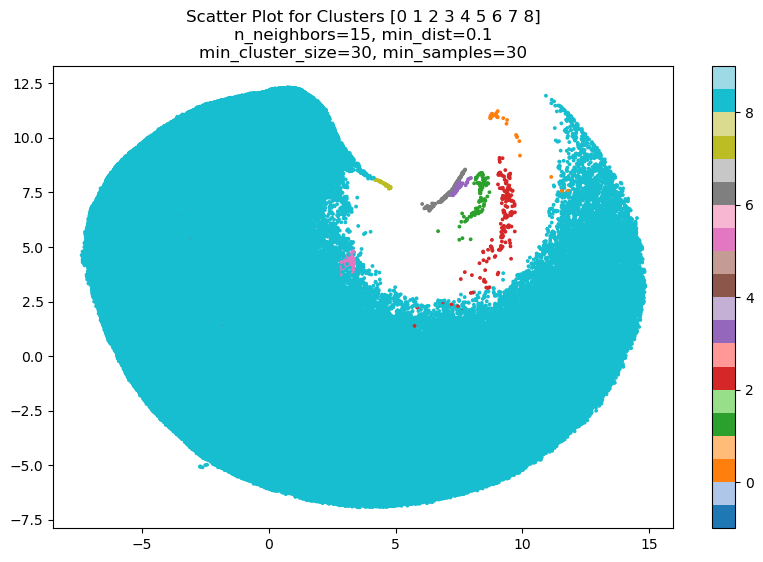

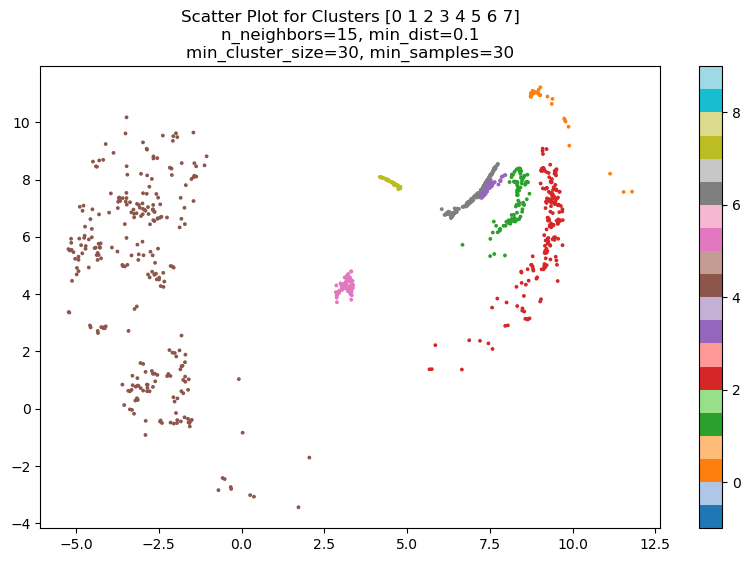

In [ ]:
target_clusters = np.arange(0, double30_30.max())
selected_points = proj_single[np.isin(double30_30, target_clusters)]
selected_labels = double30_30[np.isin(double30_30, target_clusters)]
norm = Normalize(vmin=double30_30.min(), vmax=double30_30.max())

plt.figure(figsize=(10, 6))
plt.scatter(selected_points[:, 0], selected_points[:, 1], c=selected_labels, cmap='tab20', norm=norm, s=3)
plt.title(f"Scatter Plot for Clusters {target_clusters}\nn_neighbors=15, min_dist=0.1\nmin_cluster_size=30, min_samples=30")
plt.colorbar()
plt.show()


target_clusters = np.arange(0, double30_30.max()-1)  # List of cluster labels to plot
selected_points = proj_single[np.isin(double30_30, target_clusters)]
selected_labels = double30_30[np.isin(double30_30, target_clusters)]
norm = Normalize(vmin=double30_30.min(), vmax=double30_30.max())

plt.figure(figsize=(10, 6))
plt.scatter(selected_points[:, 0], selected_points[:, 1], c=selected_labels, cmap='tab20', norm=norm, s=3)
plt.title(f"Scatter Plot for Clusters {target_clusters}\nn_neighbors=15, min_dist=0.1\nmin_cluster_size=30, min_samples=30")
plt.colorbar()
plt.show()

In [ ]:
target_clusters = np.arange(0, double50_5.max())
selected_points = proj_single[np.isin(double50_5, target_clusters)]
selected_labels = double50_5[np.isin(double50_5, target_clusters)]
norm = Normalize(vmin=double50_5.min(), vmax=double50_5.max())

plt.figure(figsize=(10, 6))
plt.scatter(selected_points[:, 0], selected_points[:, 1], c=selected_labels, cmap='tab20', norm=norm, s=3)
plt.title(f"Scatter Plot for Clusters {target_clusters}\nn_neighbors=15, min_dist=0.1\nmin_cluster_size=50, min_samples=5")
plt.colorbar()
plt.show()


target_clusters = np.arange(0, double50_5.max()-1)  # List of cluster labels to plot
selected_points = proj_single[np.isin(double50_5, target_clusters)]
selected_labels = double50_5[np.isin(double50_5, target_clusters)]
norm = Normalize(vmin=double50_5.min(), vmax=double50_5.max())

plt.figure(figsize=(10, 6))
plt.scatter(selected_points[:, 0], selected_points[:, 1], c=selected_labels, cmap='tab20', norm=norm, s=3)
plt.title(f"Scatter Plot for Clusters {target_clusters}\nn_neighbors=15, min_dist=0.1\nmin_cluster_size=50, min_samples=5")
plt.colorbar()
plt.show()